In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

Welcome to JupyROOT 6.26/02


In [2]:
save_dir = "with_shield"
events_in_this_sim = 190.0e6
livetime = (events_in_this_sim/50.0e6)*21.8
print('Total livetime = %0.3f sec'%(livetime))

Total livetime = 82.840 sec


In [3]:
dir_ = '/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files'
inFile_k100 = '%s/sim_190M_PuBe_sourceAndshields_boronBox_walls_floor_boronShield_V6H6_1inch_withFlags.root'%(dir_)


file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree_k100 = file_k100["simtree"]

if(not tree_k100):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

EV = tree_k100["EV"].array(library="np")
EV = EV - 1
Type = tree_k100["Type"].array(library="np")
E1 = tree_k100["E1"].array(library="np")
D3 = tree_k100["D3"].array(library="np")
DT = tree_k100["DT"].array(library="np")
nCap = tree_k100["nCap"].array(library="np")
time1 = tree_k100["time1"].array(library="np")

k100 = pd.DataFrame( {'EV' : EV,
                  'Type' : Type,
                  'E1' : E1,
                  'D3' : D3,
                      'DT' : DT,
                     'nCap' : nCap,
                     'time1' : time1}
                 )
k100['Edep'] = k100.D3.map(sum)
k100['flag'] = k100.nCap.map(sum).astype(bool)
k100['TS'] = tree_k100["TS"].array(library="np")
k100.head(5)

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag,TS
0,166,"[2112, 22, 22, 11, 11, 11, 11, 11, 11, 11, 22,...","[2.3117123e-05, 0.47759342, 0.18271975, 2.762e...","[0.0, 0.0, 0.00011346, 2.762e-05, 2.826e-05, 3...","[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12994.69, 13463.884, 13463.887, 13463.887, 13...",0.477593,False,"[100040, 2600004, 2600005, 3800001, 3700001, 3..."
1,174,"[22, 11, 11, 11, 11, 11, 11]","[0.1727997, 2.762e-05, 2.94e-05, 0.0001695, 0....","[8.282e-05, 2.762e-05, 2.94e-05, 0.0001695, 0....","[2013, 2013, 2013, 2013, 2013, 2013, 2013]","[0, 0, 0, 0, 0, 0, 0]","[24.067944, 24.067944, 24.067944, 24.067944, 2...",0.172800,False,"[500015, 2600001, 2500001, 2400001, 2300001, 2..."
2,366,"[22, 22, 22]","[2.223048, 2.223048, 2.223048]","[0.0, 0.0, 0.0]","[2020, 2019, 2018]","[0, 0, 0]","[489024.4, 489024.78, 489024.8]",0.000000,False,"[13700006, 13700008, 13700010]"
3,565,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 22, 1...","[0.477602, 1.624e-05, 2.826e-05, 2.648e-05, 3....","[0.0001589, 1.624e-05, 2.826e-05, 2.648e-05, 3...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[360157.6, 360157.6, 360157.6, 360157.6, 36015...",0.477602,False,"[16900004, 18100001, 18000001, 17900001, 17800..."
4,575,"[22, 22, 22, 11, 11]","[0.7827267, 0.473947, 0.40591955, 0.06802745, ...","[0.0, 0.0, 0.0, 0.06802745, 0.3087797]","[2020, 2020, 2020, 2020, 2020]","[0, 0, 0, 0, 0]","[2578122.8, 2578122.8, 2578123.0, 2578122.8, 2...",0.376807,False,"[10500006, 10500007, 10500008, 10700001, 10600..."


In [4]:
def tile_energy(df_):
    #a = (np.dstack((df_.DT,df_.D3)))[0]
    a = (np.dstack((df_.DT,df_.D3,df_.time1)))[0]
    #print (a)
    temp = {}
    for i in a:
        if(i[2] > 1.e11):
            continue
        if(i[0] in temp):
            temp[i[0]] += i[1]
        else:
            temp[i[0]] = i[1]
    #print (temp)
    return np.array([temp[i] for i in temp.keys()])

In [5]:
k100['tile_energy'] = k100.apply(tile_energy,axis=1)

In [6]:
def Egamma(df_):
    indices = np.where(df_.Type == 22)[0]
    energy = []
    gammas = {}
    for i in indices:
        #print(df_.TS)
        track = int((df_.TS)[i]/1e5)
        if(not (track in gammas)):
            gammas[track] = 'yolo'+str(track)
            energy.append((df_.E1)[i])
    return energy

In [7]:
k100['Egamma'] = k100.apply(Egamma,axis=1)

In [8]:
def nCap_isoTope(df_):
    if(df_.flag == 0):
        if(76 in ([int(i*10) for i in (df_.Egamma)])):
            return 57026
        else:
            return -1
    else:
        index = np.where(df_.nCap ==1)[0][0]
        return (df_.Type)[index+1]

In [9]:
k100['nCapType'] = k100.apply(nCap_isoTope,axis=1)

In [10]:
indices = np.where(k100[k100.EV == 166].Type.explode() == 22)[0]
[int((k100[k100.EV == 166].TS.explode()).iloc[i]/1e5) for i in indices]

[26, 26, 31, 30]

In [11]:
k100.head(5)

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag,TS,tile_energy,Egamma,nCapType
0,166,"[2112, 22, 22, 11, 11, 11, 11, 11, 11, 11, 22,...","[2.3117123e-05, 0.47759342, 0.18271975, 2.762e...","[0.0, 0.0, 0.00011346, 2.762e-05, 2.826e-05, 3...","[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12994.69, 13463.884, 13463.887, 13463.887, 13...",0.477593,False,"[100040, 2600004, 2600005, 3800001, 3700001, 3...",[0.4775934128301742],"[0.47759342, 0.00421604, 0.0283065]",-1
1,174,"[22, 11, 11, 11, 11, 11, 11]","[0.1727997, 2.762e-05, 2.94e-05, 0.0001695, 0....","[8.282e-05, 2.762e-05, 2.94e-05, 0.0001695, 0....","[2013, 2013, 2013, 2013, 2013, 2013, 2013]","[0, 0, 0, 0, 0, 0, 0]","[24.067944, 24.067944, 24.067944, 24.067944, 2...",0.172800,False,"[500015, 2600001, 2500001, 2400001, 2300001, 2...",[0.17279971121206472],[0.1727997],-1
2,366,"[22, 22, 22]","[2.223048, 2.223048, 2.223048]","[0.0, 0.0, 0.0]","[2020, 2019, 2018]","[0, 0, 0]","[489024.4, 489024.78, 489024.8]",0.000000,False,"[13700006, 13700008, 13700010]","[0.0, 0.0, 0.0]",[2.223048],-1
3,565,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 22, 1...","[0.477602, 1.624e-05, 2.826e-05, 2.648e-05, 3....","[0.0001589, 1.624e-05, 2.826e-05, 2.648e-05, 3...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[360157.6, 360157.6, 360157.6, 360157.6, 36015...",0.477602,False,"[16900004, 18100001, 18000001, 17900001, 17800...",[0.4776020107765362],"[0.477602, 0.0286095]",-1
4,575,"[22, 22, 22, 11, 11]","[0.7827267, 0.473947, 0.40591955, 0.06802745, ...","[0.0, 0.0, 0.0, 0.06802745, 0.3087797]","[2020, 2020, 2020, 2020, 2020]","[0, 0, 0, 0, 0]","[2578122.8, 2578122.8, 2578123.0, 2578122.8, 2...",0.376807,False,"[10500006, 10500007, 10500008, 10700001, 10600...",[0.3768071383237839],[0.7827267],-1


In [12]:
k100[(k100.Edep > 6) & (k100.Edep < 8) & (k100.nCapType != 128053)].nCapType.value_counts()

-1        9271
 57026    3150
 24011      96
 23010       5
 20009       4
Name: nCapType, dtype: int64

In [18]:
k100[k100.nCapType == 24011].tile_energy.map(sum)

2282       6.494371
4495       3.206758
6302       5.229578
9306       0.967278
9459       6.631008
             ...   
1185665    1.086984
1187640    2.590129
1196069    4.829568
1196080    6.959676
1198114    0.948612
Name: tile_energy, Length: 502, dtype: float64

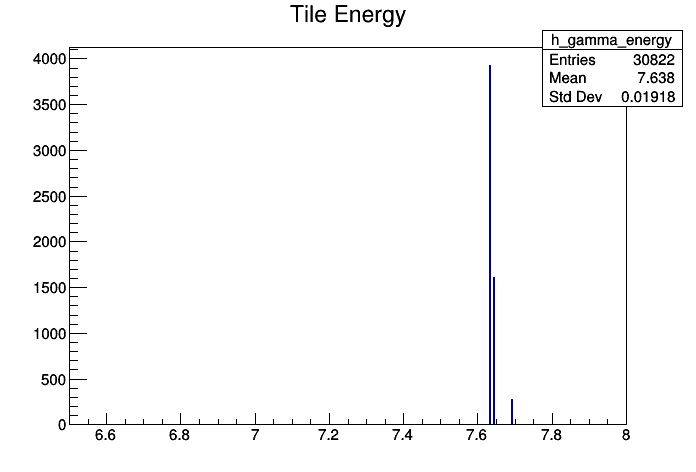

In [13]:
#gamma_energy = k100[(k100.Edep > 6) & (k100.Edep < 8) & (k100.nCapType != 128053)].Egamma.explode()
gamma_energy = k100[(k100.nCapType == 57026)].Egamma.explode()
h_gamma_energy = rt.TH1F("h_gamma_energy","Tile Energy",500,6.5,8)
h_gamma_energy.Sumw2()

for energy in gamma_energy:
#     temp = int(energy*10)
#     if(temp == 76):
#         continue
    h_gamma_energy.Fill(energy)
    
c = rt.TCanvas()
h_gamma_energy.Draw('hist')
rt.gStyle.SetOptStat(1111)
#rt.gPad.SetLogy()
c.Draw()

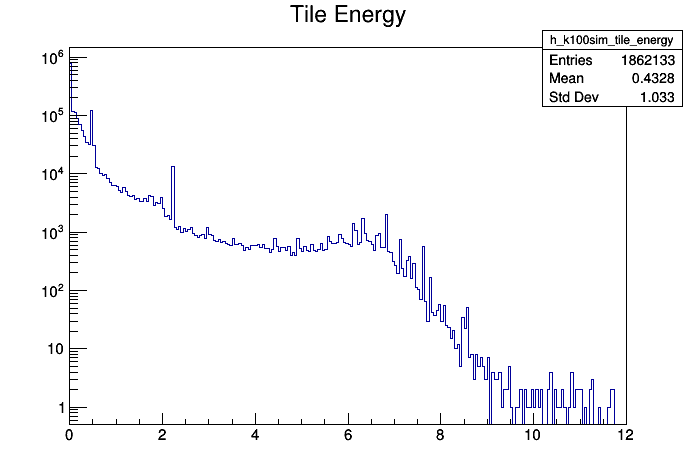

In [14]:
h_k100sim_tile_energy = rt.TH1F("h_k100sim_tile_energy","Tile Energy",240,0,12)
h_k100sim_tile_energy.Sumw2()
tileEnergy = k100.tile_energy.explode()
for energy in tileEnergy:
    h_k100sim_tile_energy.Fill(energy)
    
c = rt.TCanvas()
h_k100sim_tile_energy.Draw('hist')
rt.gPad.SetLogy()
c.Draw()

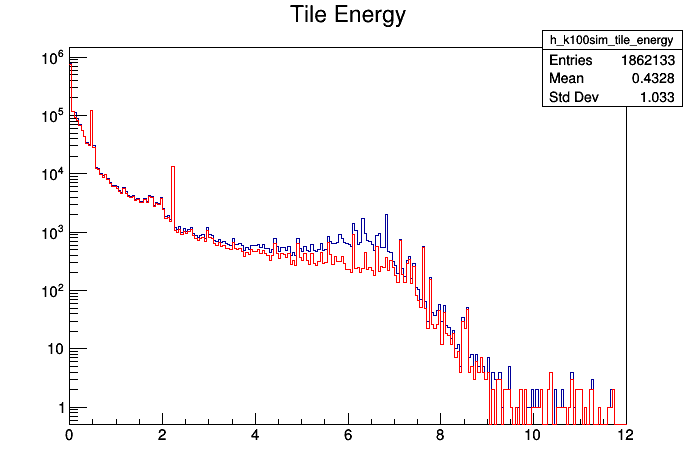

In [15]:
h_k100sim_tile_energy_sansI127 = rt.TH1F("h_k100sim_tile_energy_sansI127","Tile Energy sans I127",240,0,12)
h_k100sim_tile_energy_sansI127.Sumw2()
tileEnergy = k100[k100.nCapType != 128053].tile_energy.explode()

for energy in tileEnergy:
    h_k100sim_tile_energy_sansI127.Fill(energy)
    
c = rt.TCanvas()
h_k100sim_tile_energy.Draw('hist')
h_k100sim_tile_energy_sansI127.SetLineColor(rt.kRed)
h_k100sim_tile_energy_sansI127.Draw('hist same')
rt.gPad.SetLogy()
c.Draw()

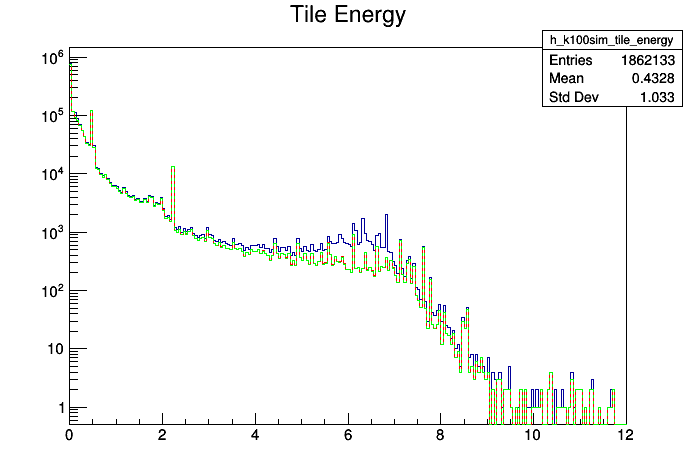

In [17]:
h_k100sim_tile_energy_sansI127_Na23 = rt.TH1F("h_k100sim_tile_energy_sansI127_Na23","Tile Energy sans I127 & Na23",240,0,12)
h_k100sim_tile_energy_sansI127_Na23.Sumw2()
tileEnergy = k100[(k100.nCapType != 128053) & (k100.nCapType != 24011)].tile_energy.explode()

for energy in tileEnergy:
    h_k100sim_tile_energy_sansI127_Na23.Fill(energy)
    
c = rt.TCanvas()
h_k100sim_tile_energy.Draw('hist')
h_k100sim_tile_energy_sansI127.SetLineColor(rt.kRed)
h_k100sim_tile_energy_sansI127.Draw('hist same')
h_k100sim_tile_energy_sansI127_Na23.SetLineColor(rt.kGreen)
h_k100sim_tile_energy_sansI127_Na23.SetLineStyle(2)
h_k100sim_tile_energy_sansI127_Na23.Draw('hist same')
rt.gPad.SetLogy()
c.Draw()

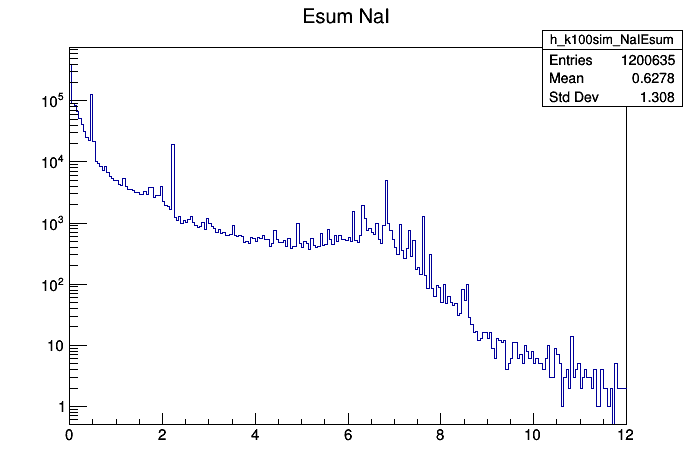

In [18]:
NaI_Esum = [np.sum(i) for i in k100.tile_energy]
h_k100sim_NaIEsum = rt.TH1F("h_k100sim_NaIEsum","Esum NaI",240,0,12)
h_k100sim_NaIEsum.Sumw2()

for energy in NaI_Esum:
    h_k100sim_NaIEsum.Fill(energy)
    
c = rt.TCanvas()
h_k100sim_NaIEsum.Draw('hist')
rt.gPad.SetLogy()
c.Draw()

In [17]:
#[round(i,3) for i in np.arange(0.125,11.975,0.05)]
len([round(i,3) for i in np.arange(0.15,12.,0.05)])
up_thresholds = [round(i,3) for i in np.arange(0.15,12.,0.05)]
low_thresholds = [round(i,3) for i in np.arange(0.1,11.95,0.05)]
mid = [round(i,3) for i in np.arange(0.125,11.975,0.05)]
print('low  = ',(low_thresholds[0:10]))
print('high = ',(up_thresholds[0:10]))
print('center = ',(mid[0:10]))

low  =  [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
high =  [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
center =  [0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525, 0.575]


In [23]:
def calculate_trigger():
    print ('Calculating trigger rate...')
    triggered_events = 0
    up_thresholds = [round(i,3) for i in np.arange(0.15,12.,0.05)]
    low_thresholds = [round(i,3) for i in np.arange(0.1,11.95,0.05)]
    mid = [round(i,3) for i in np.arange(0.125,11.975,0.05)]
    triggered_list = {}
    n = len(mid)
    trig_event_list = np.zeros(n)
    skipped_events = 0
    for threshold in mid:
        triggered_list['%f'%(threshold)] = 0



    for i in tqdm(range(len(k100))):
        temp_trigger = np.zeros(n)
        temp_veto = np.zeros(n)
        for energy in k100.tile_energy.iloc[i]:
            veto = False
            trigger = False

            for j,threshold in enumerate(up_thresholds):
                if(energy > threshold):
                    temp_veto[j] = True
                elif(energy > low_thresholds[j]):
                    temp_trigger[j] = True

        for j in range(n):
            if(not temp_veto[j] and temp_trigger[j]):
                triggered_list['%f'%(mid[j])] += 1
            #triggered_events += 1
    #         print('%d : %f'%(i,energy))
    #         break
#         print ('event = ',i)
#         print ('tile_energy = ',k100.tile_energy.iloc[i])
#         print ('trigger = ',temp_trigger)
#         print ('veto = ',temp_veto)

    
    #print (triggered_list)
#     print('Total trigger events = %d'%(triggered_list['3.125']))
#     print('Total trigger rate = %f Hz'%(triggered_list['3.125']/0.218))
    print('Skipped events = ',skipped_events)
    livetime = (events_in_this_sim - skipped_events) * (21.8/50e6)
    print ('Full livetime = %0.4f sec'%(events_in_this_sim*((21.8/50e6))))
    print ('After removal livetime = %0.4f sec'%(livetime))
    x = np.zeros(n)
    y = np.zeros(n)
    erry = np.zeros(n)
    for i,j in enumerate(triggered_list.keys()):
        x[i] = float(j)
        y[i] = (triggered_list[j])/livetime
        
        erry[i] = np.sqrt(triggered_list[j])/livetime
    return np.c_[np.c_[x,y],erry]

In [24]:
trigger_rate = calculate_trigger()


Calculating trigger rate...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [00:55<00:00, 21736.97it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


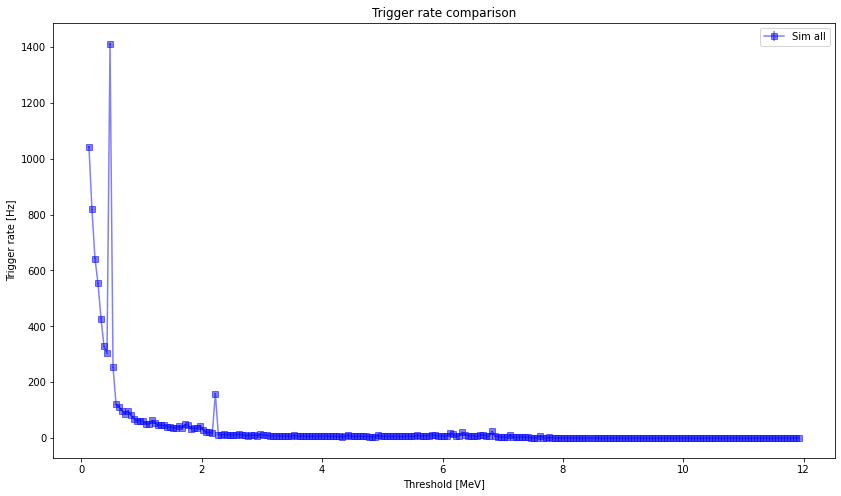

In [20]:
fig = plt.figure(figsize=(14.0,8.0))

plt.errorbar(trigger_rate[:,0], trigger_rate[:,1], yerr=trigger_rate[:,2], marker='s', color='blue', alpha=0.5, label='Sim all')

# plt.scatter(trigger_rate_inclusive[:,0], trigger_rate_inclusive[:,1], marker='s', color='blue', alpha=0.5, label='Sim all')
# plt.scatter(trigger_rate_sansFe56[:,0], trigger_rate_sansFe56[:,1], marker='v', color='green', alpha=0.5, label='Sim w/o Fe56')
# plt.scatter(trigger_rate_sansCl35[:,0], trigger_rate_sansCl35[:,1], marker='X', color='magenta', alpha=0.5, label='Sim w/o Cl35')
# plt.scatter(trigger_rate_sansI127[:,0], trigger_rate_sansI127[:,1], marker='^', color='red', alpha=0.5, label='Sim w/o I127')
#plt.scatter(data_rate[:,0], data_rate[:,1], color='black', label='data')

plt.xlabel('Threshold [MeV]')
plt.ylabel('Trigger rate [Hz]')

plt.legend()

plt.title("Trigger rate comparison")
plt.show()

In [25]:
h_k100sim_bkg_NaI_Edep_all_zoomed = rt.TH1F("h_k100sim_bkg_NaI_Edep_all_zoomed","Energy deposited in NaI (zoomed)",240,0,12)
h_k100sim_bkg_NaI_Edep_all_zoomed.Sumw2()

i = 3
while (i < h_k100sim_bkg_NaI_Edep_all_zoomed.GetNbinsX()):
    if((i-3) > len(trigger_rate)):
        break
    bincenter = round(h_k100sim_bkg_NaI_Edep_all_zoomed.GetBinCenter(i),3)
    if(bincenter != trigger_rate[i-3][0]):
        print(bincenter, ' : ', trigger_rate[i-3][0])
        break
    else:
        h_k100sim_bkg_NaI_Edep_all_zoomed.SetBinContent(i,trigger_rate[i-3][1])
        h_k100sim_bkg_NaI_Edep_all_zoomed.SetBinError(i,trigger_rate[i-3][2])
    i += 1


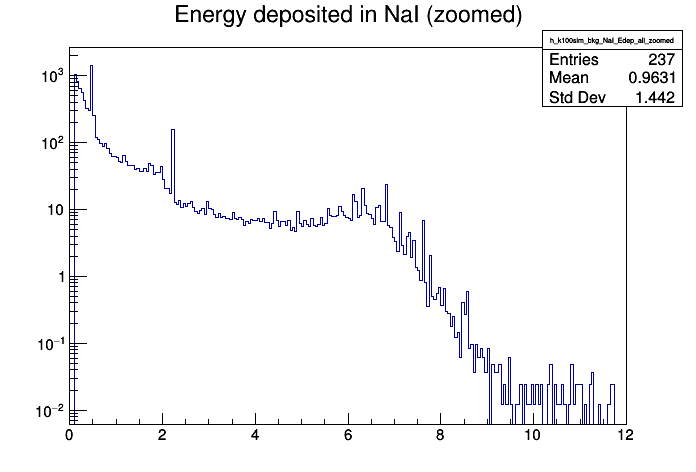

In [26]:
c = rt.TCanvas()
h_k100sim_bkg_NaI_Edep_all_zoomed.Draw('hist')

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

In [ ]:
tileEnergy.iloc[10]

In [27]:
df = pd.read_excel('./r76_NaI_spectrum.xlsx')
df = df.dropna()

df = df.rename(columns={'lower (MeV)': 'lower', ' upper (MeV)': 'upper','bin center [MeV]': 'bin_center',' rate':'rate', 'Unnamed: 4':'error'})

In [28]:
df.head()
df.columns

Index(['lower', 'upper', 'bin_center', 'rate', 'error', 'cumulative, max 11'], dtype='object')

In [29]:
h_data = rt.TH1F("h_data","Energy deposited in NaI (data)",240,0,12)
h_data.Sumw2()

i = 3
while (i < h_data.GetNbinsX()):
#     if((i-3) > len(trigger_rate)):
#         break
    bincenter = round(h_data.GetBinCenter(i),3)
    if(i == 220):
        break
    
    df_center = round(df.bin_center.iloc[i-3],3)
    if(bincenter != df_center ):
    #if(bincenter != round( df.bin_center.iloc[i-3] ,3) ):
        print(i, ' : ' ,bincenter, ' : ', df.bin_center.iloc[i-3])
        break
    else:
        h_data.SetBinContent(i,df.rate.iloc[i-3])
        h_data.SetBinError(i,df.error.iloc[i-3])
    i += 1


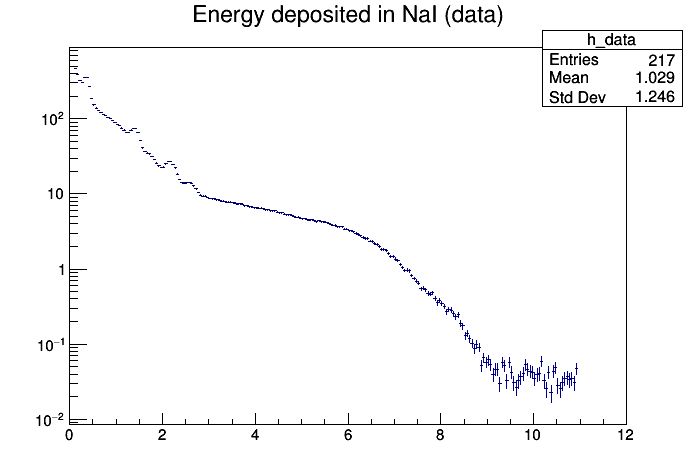

In [30]:
c = rt.TCanvas()
h_data.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

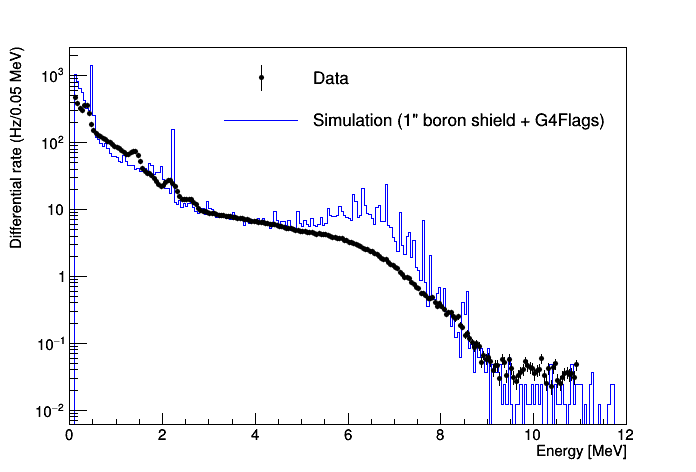

In [31]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)
h_k100sim_bkg_NaI_Edep_all_zoomed.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_all_zoomed.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_zoomed.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_zoomed.Draw('hist')
h_data.Draw('same')

legend = rt.TLegend(0.3,0.88,0.9,0.7)
legend.SetTextSize(0.04)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_zoomed,'Simulation (1" boron shield + G4Flags)','l')
legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

 FCN=51.2421 FROM HESSE     STATUS=NOT POSDEF     31 CALLS        1096 TOTAL
                     EDM=1.10044e-06    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.33035e+01   1.00433e-02   3.17179e-06   1.49933e+00
   2  p1          -4.42255e+00   4.50080e-03   1.05442e-06   3.01337e+00
   3  p2          -1.34815e+02   1.29869e+00   1.22321e-04   7.84646e-03
   4  p3           1.77138e+00   2.25249e-03   4.22330e-07  -6.70885e+00
   5  p4           1.87553e-01   1.05433e-03   1.16620e-07  -8.34847e+00


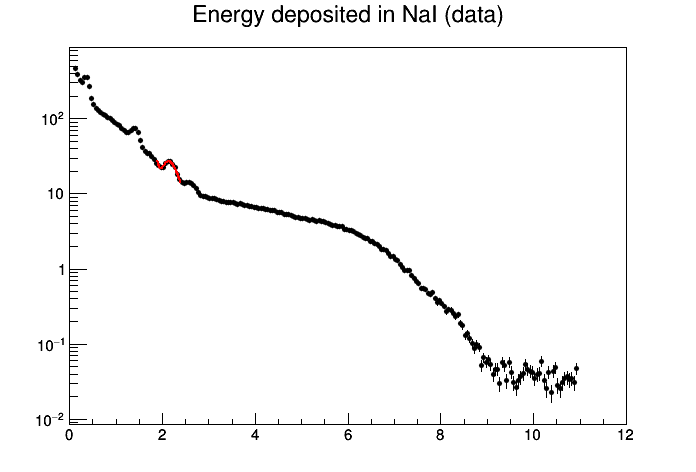

In [28]:
reso = rt.TF1("reso","expo+gaus(2)",0,2.5)
reso.SetParameters(10,-3,-40,2,0.05)
h_data.Fit(reso,"R","",1.9,2.4)
c = rt.TCanvas()
h_data.Draw()
rt.gPad.SetLogy()
c.Draw()

 FCN=31291.4 FROM MIGRAD    STATUS=CALL LIMIT   1636 CALLS        1637 TOTAL
                     EDM=3.11593    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  43.2 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.34964e+00   9.05323e-03  -8.93961e-03  -3.14532e+03
   2  p1          -1.68273e+00   7.45136e-03   4.54808e-03  -9.43698e+02
   3  p2          -2.65062e+05   9.51866e+02  -9.03088e+02  -1.12294e-03
   4  p3          -8.58644e+00   2.19162e-02  -1.84507e-02   6.23281e+02
   5  p4           2.09038e+00   5.23625e-03  -4.97110e-03   2.70346e+03


Warning in <Fit>: Abnormal termination of minimization.


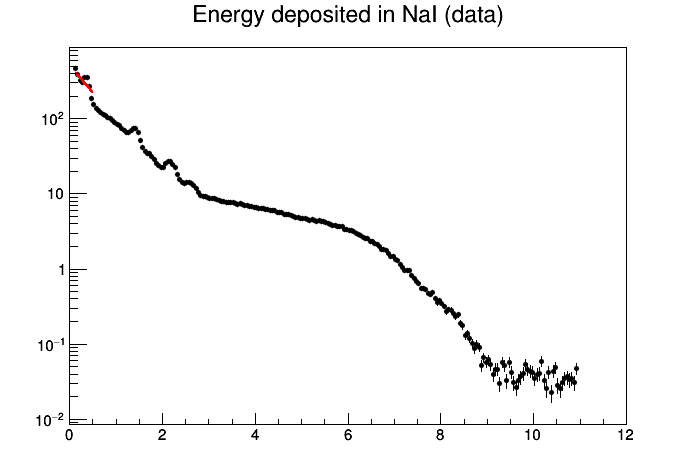

In [29]:
reso_511kev = rt.TF1("reso_511kev","expo+gaus(2)",0,1.5)
reso_511kev.SetParameters(10,-2,-40,0.5,0.05)
h_data.Fit(reso_511kev,"R","",0.15,0.5)
c = rt.TCanvas()
h_data.GetXaxis().SetRangeUser(0,12)
h_data.Draw()
rt.gPad.SetLogy()
c.Draw()

 FCN=1722.04 FROM MIGRAD    STATUS=CONVERGED     646 CALLS         647 TOTAL
                     EDM=1.13915e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.71428e+00   1.02383e-01  -4.29107e-05  -7.88801e-02
   2  p1          -3.72628e+00   6.27766e-02   3.01494e-05  -9.26849e-02
   3  p2          -1.95102e+02   1.21361e+01   1.97437e-03  -2.02827e-04
   4  p3           1.04256e+00   7.25819e-03  -3.28460e-07   1.03922e-01
   5  p4           1.65618e-01   3.62888e-03   5.74059e-07   1.19101e-01


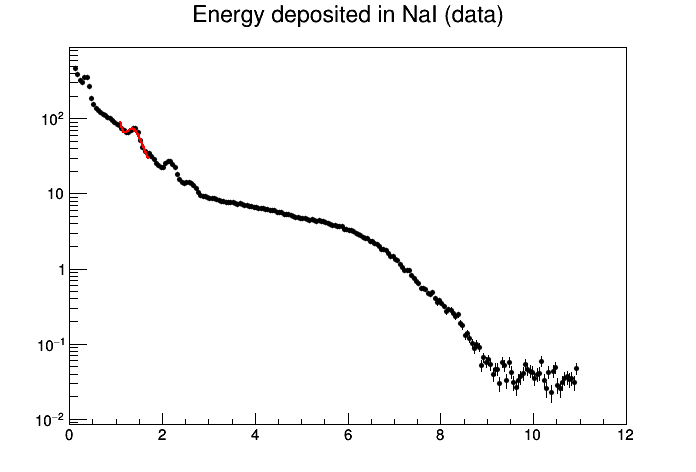

In [30]:
fit_min = 1.1
fit_max = 1.7
reso_1440kev = rt.TF1("reso_1440kev","expo+gaus(2)",fit_min,fit_max)
reso_1440kev.SetParameters(10,-3,-40,1.4,0.1)
h_data.Fit(reso_1440kev,"R","",fit_min,fit_max)
c = rt.TCanvas()
h_data.GetXaxis().SetRangeUser(0,12)
h_data.Draw()
rt.gPad.SetLogy()
c.Draw()

 FCN=111.501 FROM MIGRAD    STATUS=CONVERGED     399 CALLS         400 TOTAL
                     EDM=1.02805e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   7.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.10222e+00   9.50652e-02  -3.29473e-04  -4.58833e-02
   2  p1          -1.33473e+00   3.41695e-02   1.16832e-04  -1.21301e-01
   3  p2          -3.59788e+00   2.51801e-01   1.12547e-03  -1.91512e-04
   4  p3           2.41558e+00   3.63208e-03   1.25503e-05  -4.16349e-02
   5  p4           7.26177e-02   4.62825e-03  -9.32407e-06   2.17781e-02


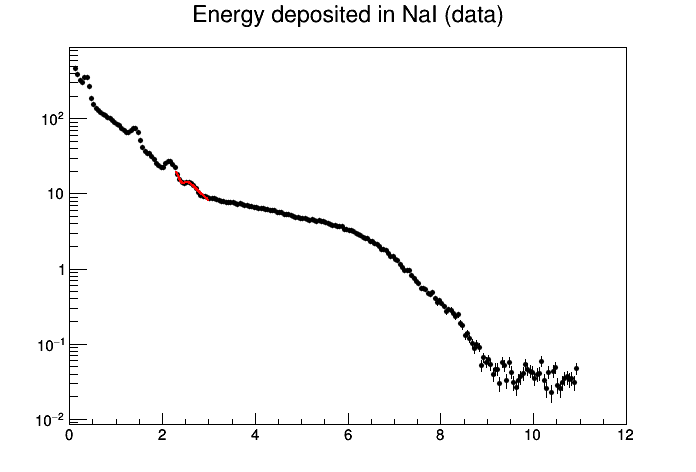

In [31]:
fit_min = 2.3
fit_max = 3.0
reso_2500kev = rt.TF1("reso_2500kev","expo+gaus(2)",fit_min,fit_max)
reso_2500kev.SetParameters(1,-2,-3,2.4,0.2)
h_data.Fit(reso_2500kev,"R","",fit_min,fit_max)
c = rt.TCanvas()
h_data.GetXaxis().SetRangeUser(0,12)
h_data.Draw()
rt.gPad.SetLogy()
c.Draw()

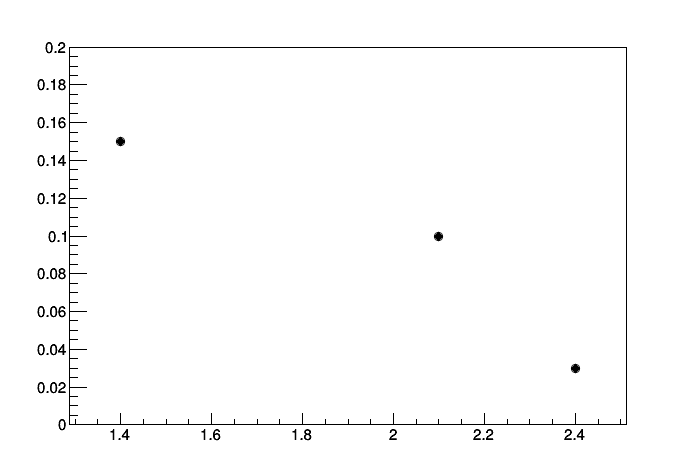

In [32]:
c = rt.TCanvas()
gr = rt.TGraph()
gr.SetPoint(0,1.4,0.15)
gr.SetPoint(1,2.1,0.1)
gr.SetPoint(2,2.4,0.03)
gr.SetMarkerStyle(rt.kFullCircle)
gr.SetMarkerColor(rt.kBlack)
gr.GetXaxis().SetRangeUser(0,5)
gr.GetYaxis().SetRangeUser(0,0.2)
gr.Draw('AP')
c.Draw()

at 0.5 = 0.064
at 1.4 = 0.051
at 2.1 = 0.047
at 2.4 = 0.045


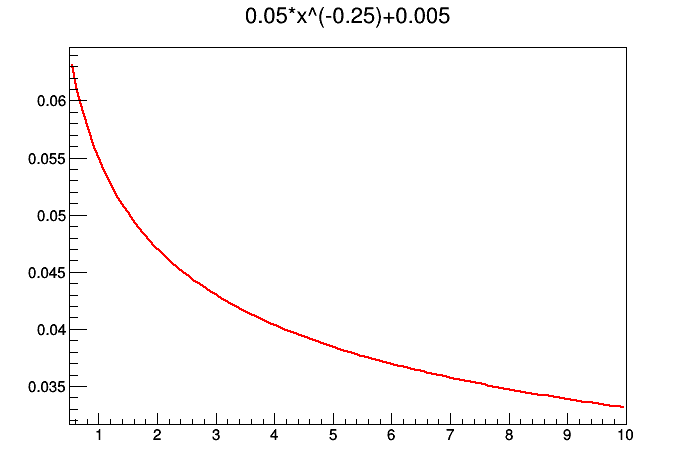

In [32]:
resoNaI = rt.TF1("resoNaI","0.05*x^(-0.25)+0.005",0.5,10)
c = rt.TCanvas()
resoNaI.Draw()
c.Draw()
print('at 0.5 = %0.3f'%(resoNaI.Eval(0.5)))
print('at 1.4 = %0.3f'%(resoNaI.Eval(1.4)))
print('at 2.1 = %0.3f'%(resoNaI.Eval(2.1)))
print('at 2.4 = %0.3f'%(resoNaI.Eval(2.4)))

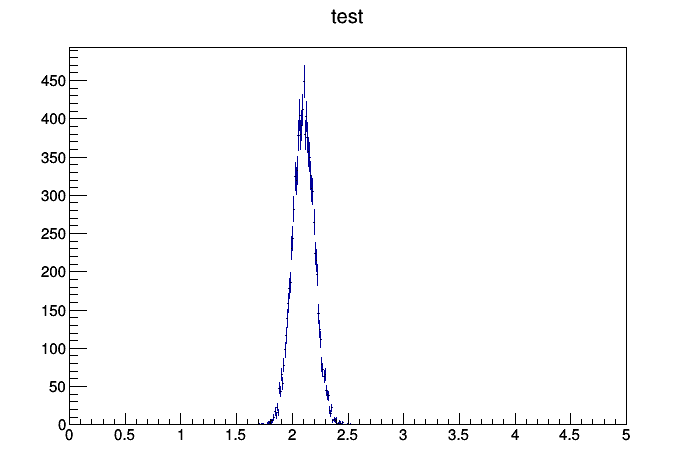

In [33]:
test = rt.TH1F('test','test',500,0,5)
test.Sumw2()
rand = rt.TRandom3()
#resoNaI = rt.TF1("resoNaI","0.1*x^(-0.25)+0.005",0.5,10)
for i in range(10000):
    energy = 2.1
    smear = resoNaI.Eval(energy)
    smeared_energy = rand.Gaus(energy,energy*smear)
    test.Fill(smeared_energy)
    
c = rt.TCanvas()
test.Draw()
c.Draw()

In [34]:
def calculate_trigger_smeared():
    print ('Calculating trigger rate...')
    triggered_events = 0
    up_thresholds = [round(i,3) for i in np.arange(0.15,12.,0.05)]
    low_thresholds = [round(i,3) for i in np.arange(0.1,11.95,0.05)]
    mid = [round(i,3) for i in np.arange(0.125,11.975,0.05)]
    triggered_list = {}
    n = len(mid)
    trig_event_list = np.zeros(n)
    skipped_events = 0
    for threshold in mid:
        triggered_list['%f'%(threshold)] = 0


    rand = rt.TRandom3()
    resoNaI = rt.TF1("resoNaI","0.05*x^(-0.25)+0.005",0.5,10)
    for i in tqdm(range(len(k100))):
        temp_trigger = np.zeros(n)
        temp_veto = np.zeros(n)
        for energy in k100.tile_energy.iloc[i]:
            smear = resoNaI.Eval(energy)
            smeared_energy = rand.Gaus(energy,energy*smear)
            if(smeared_energy < 0):
                energy = 0.
            else:
                energy = smeared_energy
            veto = False
            trigger = False

            for j,threshold in enumerate(up_thresholds):
                
                if(energy > threshold):
                    temp_veto[j] = True
                elif(energy > low_thresholds[j]):
                    temp_trigger[j] = True

        for j in range(n):
            if(not temp_veto[j] and temp_trigger[j]):
                triggered_list['%f'%(mid[j])] += 1
            #triggered_events += 1
    #         print('%d : %f'%(i,energy))
    #         break
#         print ('event = ',i)
#         print ('tile_energy = ',k100.tile_energy.iloc[i])
#         print ('trigger = ',temp_trigger)
#         print ('veto = ',temp_veto)

    
    #print (triggered_list)
#     print('Total trigger events = %d'%(triggered_list['3.125']))
#     print('Total trigger rate = %f Hz'%(triggered_list['3.125']/0.218))
    print('Skipped events = ',skipped_events)
    livetime = (events_in_this_sim - skipped_events) * (21.8/50e6)
    print ('Full livetime = %0.4f sec'%(events_in_this_sim*((21.8/50e6))))
    print ('After removal livetime = %0.4f sec'%(livetime))
    x = np.zeros(n)
    y = np.zeros(n)
    erry = np.zeros(n)
    for i,j in enumerate(triggered_list.keys()):
        x[i] = float(j)
        y[i] = (triggered_list[j])/livetime
        
        erry[i] = np.sqrt(triggered_list[j])/livetime
    return np.c_[np.c_[x,y],erry]

In [35]:
trigger_rate_smeared = calculate_trigger_smeared()

Calculating trigger rate...


  0%|                                                                                                                                                                                                | 0/1200635 [00:00<?, ?it/s]/var/folders/x7/33tkj9dx0bzcnj7gh4sb5tlc0000gn/T/ipykernel_9630/755070798.py:22: RuntimeWarning: invalid value encountered in double_scalars
  smeared_energy = rand.Gaus(energy,energy*smear)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [01:21<00:00, 14698.14it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


In [36]:
h_k100sim_bkg_NaI_Edep_all_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_all_smeared","Energy deposited in NaI (smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_all_smeared.Sumw2()

i = 3
while (i < h_k100sim_bkg_NaI_Edep_all_smeared.GetNbinsX()):
    if((i-3) > len(trigger_rate_smeared)):
        break
    bincenter = round(h_k100sim_bkg_NaI_Edep_all_smeared.GetBinCenter(i),3)
    if(bincenter != trigger_rate_smeared[i-3][0]):
        print(bincenter, ' : ', trigger_rate_smeared[i-3][0])
        break
    else:
        h_k100sim_bkg_NaI_Edep_all_smeared.SetBinContent(i,trigger_rate_smeared[i-3][1])
        h_k100sim_bkg_NaI_Edep_all_smeared.SetBinError(i,trigger_rate_smeared[i-3][2])
    i += 1

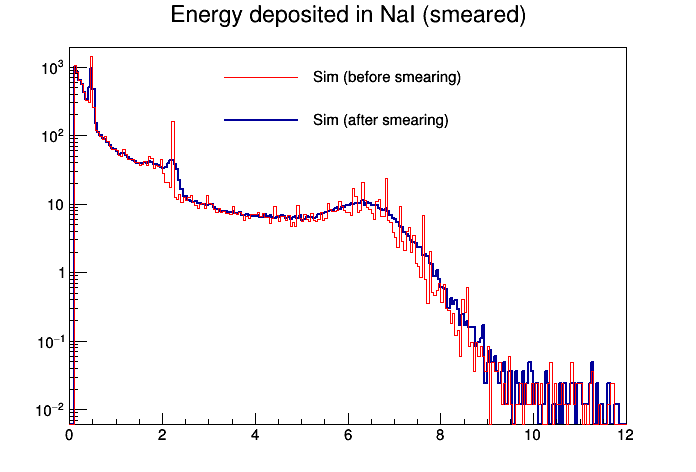

In [37]:
c = rt.TCanvas()
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')
h_k100sim_bkg_NaI_Edep_all_smeared.SetLineWidth(2)
h_k100sim_bkg_NaI_Edep_all_zoomed.SetLineColor(rt.kRed)
h_k100sim_bkg_NaI_Edep_all_zoomed.Draw('hist same')

legend = rt.TLegend(0.3,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_zoomed,'Sim (before smearing)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_smeared,'Sim (after smearing)','l')
legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

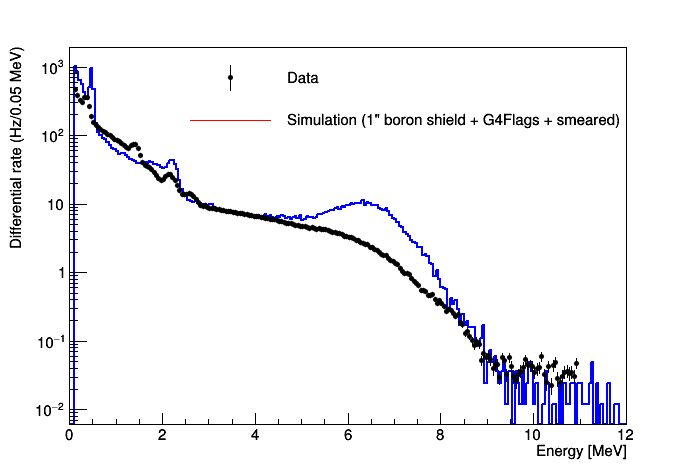

In [38]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)
h_k100sim_bkg_NaI_Edep_all_smeared.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_all_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')
h_data.Draw('same')

legend = rt.TLegend(0.25,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_zoomed,'Simulation (1" boron shield + G4Flags + smeared)','l')
legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

In [43]:
def calculate_trigger_smeared_PID(pid):
    print ('Calculating trigger rate...')
    triggered_events = 0
    up_thresholds = [round(i,3) for i in np.arange(0.15,12.,0.05)]
    low_thresholds = [round(i,3) for i in np.arange(0.1,11.95,0.05)]
    mid = [round(i,3) for i in np.arange(0.125,11.975,0.05)]
    triggered_list = {}
    n = len(mid)
    trig_event_list = np.zeros(n)
    skipped_events = 0
    for threshold in mid:
        triggered_list['%f'%(threshold)] = 0


    rand = rt.TRandom3()
    resoNaI = rt.TF1("resoNaI","0.05*x^(-0.25)+0.005",0.5,10)
    for i in tqdm(range(len(k100))):
        if(pid == k100.nCapType.iloc[i]):
            continue
        temp_trigger = np.zeros(n)
        temp_veto = np.zeros(n)
        for energy in k100.tile_energy.iloc[i]:
            smear = resoNaI.Eval(energy)
            smeared_energy = rand.Gaus(energy,energy*smear)
            if(smeared_energy < 0):
                energy = 0.
            else:
                energy = smeared_energy
            veto = False
            trigger = False

            for j,threshold in enumerate(up_thresholds):
                
                if(energy > threshold):
                    temp_veto[j] = True
                elif(energy > low_thresholds[j]):
                    temp_trigger[j] = True

        for j in range(n):
            if(not temp_veto[j] and temp_trigger[j]):
                triggered_list['%f'%(mid[j])] += 1
            #triggered_events += 1
    #         print('%d : %f'%(i,energy))
    #         break
#         print ('event = ',i)
#         print ('tile_energy = ',k100.tile_energy.iloc[i])
#         print ('trigger = ',temp_trigger)
#         print ('veto = ',temp_veto)

    
    #print (triggered_list)
#     print('Total trigger events = %d'%(triggered_list['3.125']))
#     print('Total trigger rate = %f Hz'%(triggered_list['3.125']/0.218))
    print('Skipped events = ',skipped_events)
    livetime = (events_in_this_sim - skipped_events) * (21.8/50e6)
    print ('Full livetime = %0.4f sec'%(events_in_this_sim*((21.8/50e6))))
    print ('After removal livetime = %0.4f sec'%(livetime))
    x = np.zeros(n)
    y = np.zeros(n)
    erry = np.zeros(n)
    for i,j in enumerate(triggered_list.keys()):
        x[i] = float(j)
        y[i] = (triggered_list[j])/livetime
        
        erry[i] = np.sqrt(triggered_list[j])/livetime
    return np.c_[np.c_[x,y],erry]

In [44]:
trigger_rate_smeared_pid = calculate_trigger_smeared_PID(128053)

Calculating trigger rate...


  0%|                                                                                                                                                                                                | 0/1200635 [00:00<?, ?it/s]/var/folders/x7/33tkj9dx0bzcnj7gh4sb5tlc0000gn/T/ipykernel_9630/48536012.py:24: RuntimeWarning: invalid value encountered in double_scalars
  smeared_energy = rand.Gaus(energy,energy*smear)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [01:22<00:00, 14541.82it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


In [45]:
h_k100sim_bkg_NaI_Edep_sansI127_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_sansI127_smeared","Energy deposited in NaI sans I127 (smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_sansI127_smeared.Sumw2()

i = 3
while (i < h_k100sim_bkg_NaI_Edep_sansI127_smeared.GetNbinsX()):
    if((i-3) > len(trigger_rate_smeared_pid)):
        break
    bincenter = round(h_k100sim_bkg_NaI_Edep_sansI127_smeared.GetBinCenter(i),3)
    if(bincenter != trigger_rate_smeared_pid[i-3][0]):
        print(bincenter, ' : ', trigger_rate_smeared_pid[i-3][0])
        break
    else:
        h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetBinContent(i,trigger_rate_smeared_pid[i-3][1])
        h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetBinError(i,trigger_rate_smeared_pid[i-3][2])
    i += 1

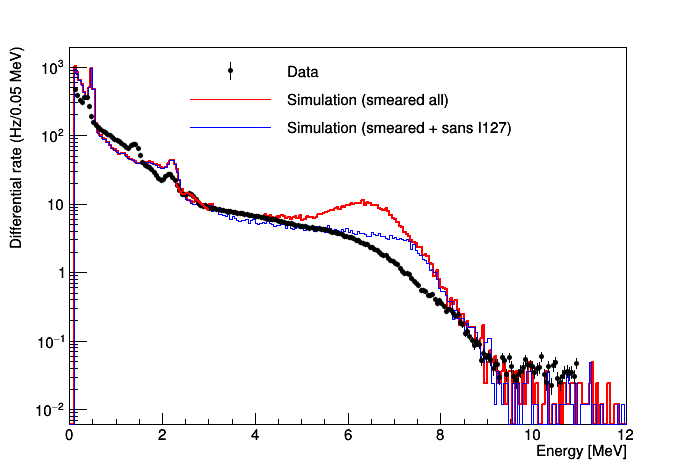

In [128]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)
h_k100sim_bkg_NaI_Edep_all_smeared.SetLineColor(rt.kRed)
h_k100sim_bkg_NaI_Edep_all_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')
h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_sansI127_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_sansI127_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_sansI127_smeared.Draw('hist same')
h_data.Draw('same')

legend = rt.TLegend(0.25,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_zoomed,'Simulation (smeared all)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_sansI127_smeared,'Simulation (smeared + sans I127)','l')
legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

In [201]:
trigger_rate_smeared_pid = calculate_trigger_smeared_PID(57026)

Calculating trigger rate...


  0%|                                                                                                      | 0/1200635 [00:00<?, ?it/s]/var/folders/x7/33tkj9dx0bzcnj7gh4sb5tlc0000gn/T/ipykernel_9491/48536012.py:24: RuntimeWarning: invalid value encountered in double_scalars
  smeared_energy = rand.Gaus(energy,energy*smear)
100%|█████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [01:31<00:00, 13191.51it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


In [202]:
h_k100sim_bkg_NaI_Edep_sansFe56_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_sansFe56_smeared","Energy deposited in NaI sans Fe56 (smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_sansFe56_smeared.Sumw2()

i = 3
while (i < h_k100sim_bkg_NaI_Edep_sansFe56_smeared.GetNbinsX()):
    if((i-3) > len(trigger_rate_smeared_pid)):
        break
    bincenter = round(h_k100sim_bkg_NaI_Edep_sansFe56_smeared.GetBinCenter(i),3)
    if(bincenter != trigger_rate_smeared_pid[i-3][0]):
        print(bincenter, ' : ', trigger_rate_smeared_pid[i-3][0])
        break
    else:
        h_k100sim_bkg_NaI_Edep_sansFe56_smeared.SetBinContent(i,trigger_rate_smeared_pid[i-3][1])
        h_k100sim_bkg_NaI_Edep_sansFe56_smeared.SetBinError(i,trigger_rate_smeared_pid[i-3][2])
    i += 1

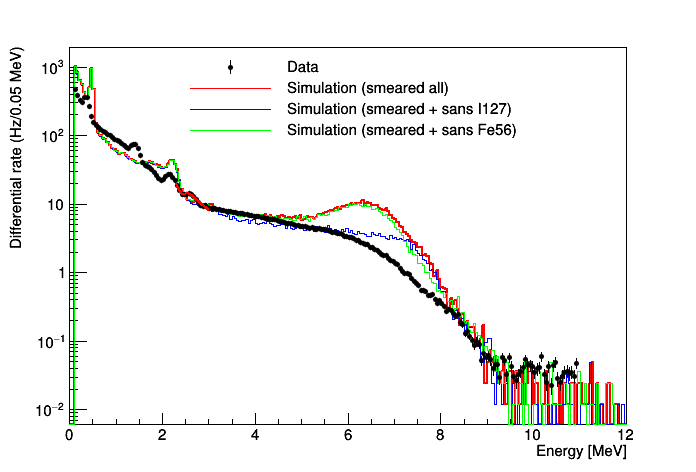

In [204]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)
h_k100sim_bkg_NaI_Edep_all_smeared.SetLineColor(rt.kRed)
h_k100sim_bkg_NaI_Edep_all_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')
h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_sansI127_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_sansI127_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_sansI127_smeared.Draw('hist same')

h_k100sim_bkg_NaI_Edep_sansFe56_smeared.SetLineColor(rt.kGreen)
h_k100sim_bkg_NaI_Edep_sansFe56_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_sansFe56_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_sansFe56_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_sansFe56_smeared.Draw('hist same')
h_data.Draw('same')

legend = rt.TLegend(0.25,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_zoomed,'Simulation (smeared all)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_sansI127_smeared,'Simulation (smeared + sans I127)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_sansFe56_smeared,'Simulation (smeared + sans Fe56)','l')
legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

In [1]:
k100

NameError: name 'k100' is not defined

In [49]:
def calculate_trigger_smeared_PID_multiple(pids):
    print ('Calculating trigger rate...')
    triggered_events = 0
    up_thresholds = [round(i,3) for i in np.arange(0.15,12.,0.05)]
    low_thresholds = [round(i,3) for i in np.arange(0.1,11.95,0.05)]
    mid = [round(i,3) for i in np.arange(0.125,11.975,0.05)]
    triggered_list = {}
    n = len(mid)
    trig_event_list = np.zeros(n)
    skipped_events = 0
    for threshold in mid:
        triggered_list['%f'%(threshold)] = 0


    rand = rt.TRandom3()
    resoNaI = rt.TF1("resoNaI","0.05*x^(-0.25)+0.005",0.5,10)
    for i in tqdm(range(len(k100))):
        if(k100.nCapType.iloc[i] in pids):
            continue
#         if((128053 == k100.nCapType.iloc[i]) | (57026 == k100.nCapType.iloc[i]) | (24011 == k100.nCapType.iloc[i])):
#             continue
        temp_trigger = np.zeros(n)
        temp_veto = np.zeros(n)
        for energy in k100.tile_energy.iloc[i]:
            smear = resoNaI.Eval(energy)
            smeared_energy = rand.Gaus(energy,energy*smear)
            if(smeared_energy < 0):
                energy = 0.
            else:
                energy = smeared_energy
            veto = False
            trigger = False

            for j,threshold in enumerate(up_thresholds):
                
                if(energy > threshold):
                    temp_veto[j] = True
                elif(energy > low_thresholds[j]):
                    temp_trigger[j] = True

        for j in range(n):
            if(not temp_veto[j] and temp_trigger[j]):
                triggered_list['%f'%(mid[j])] += 1
            #triggered_events += 1
    #         print('%d : %f'%(i,energy))
    #         break
#         print ('event = ',i)
#         print ('tile_energy = ',k100.tile_energy.iloc[i])
#         print ('trigger = ',temp_trigger)
#         print ('veto = ',temp_veto)

    
    #print (triggered_list)
#     print('Total trigger events = %d'%(triggered_list['3.125']))
#     print('Total trigger rate = %f Hz'%(triggered_list['3.125']/0.218))
    print('Skipped events = ',skipped_events)
    livetime = (events_in_this_sim - skipped_events) * (21.8/50e6)
    print ('Full livetime = %0.4f sec'%(events_in_this_sim*((21.8/50e6))))
    print ('After removal livetime = %0.4f sec'%(livetime))
    x = np.zeros(n)
    y = np.zeros(n)
    erry = np.zeros(n)
    for i,j in enumerate(triggered_list.keys()):
        x[i] = float(j)
        y[i] = (triggered_list[j])/livetime
        
        erry[i] = np.sqrt(triggered_list[j])/livetime
    return np.c_[np.c_[x,y],erry]

In [40]:
trigger_rate_smeared_pid_multiple = calculate_trigger_smeared_PID_multiple()

Calculating trigger rate...


  0%|                                                                                                                                                                                                | 0/1200635 [00:00<?, ?it/s]/var/folders/x7/33tkj9dx0bzcnj7gh4sb5tlc0000gn/T/ipykernel_9630/2171972276.py:24: RuntimeWarning: invalid value encountered in double_scalars
  smeared_energy = rand.Gaus(energy,energy*smear)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [01:34<00:00, 12771.09it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


In [47]:
h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared","Energy deposited in no I Na Fe (smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.Sumw2()

i = 3
while (i < h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.GetNbinsX()):
    if((i-3) > len(trigger_rate_smeared_pid_multiple)):
        break
    bincenter = round(h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.GetBinCenter(i),3)
    if(bincenter != trigger_rate_smeared_pid_multiple[i-3][0]):
        print(bincenter, ' : ', trigger_rate_smeared_pid_multiple[i-3][0])
        break
    else:
        h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.SetBinContent(i,trigger_rate_smeared_pid_multiple[i-3][1])
        h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.SetBinError(i,trigger_rate_smeared_pid_multiple[i-3][2])
    i += 1

In [51]:
trigger_rate_smeared_I_Na = calculate_trigger_smeared_PID_multiple([128053,24011])
h_k100sim_bkg_NaI_Edep_No_I_Na_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_No_I_Na_smeared","Energy deposited in no I Na (smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_No_I_Na_smeared.Sumw2()

i = 3
while (i < h_k100sim_bkg_NaI_Edep_No_I_Na_smeared.GetNbinsX()):
    if((i-3) > len(trigger_rate_smeared_I_Na)):
        break
    bincenter = round(h_k100sim_bkg_NaI_Edep_No_I_Na_smeared.GetBinCenter(i),3)
    if(bincenter != trigger_rate_smeared_I_Na[i-3][0]):
        print(bincenter, ' : ', trigger_rate_smeared_I_Na[i-3][0])
        break
    else:
        h_k100sim_bkg_NaI_Edep_No_I_Na_smeared.SetBinContent(i,trigger_rate_smeared_I_Na[i-3][1])
        h_k100sim_bkg_NaI_Edep_No_I_Na_smeared.SetBinError(i,trigger_rate_smeared_I_Na[i-3][2])
    i += 1

In [55]:
#trigger_rate_smeared_I_Fe = calculate_trigger_smeared_PID_multiple([128053,57026])
h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared","Energy deposited in no I Fe (smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared.Sumw2()

temp_hist = h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared
temp_trigger = trigger_rate_smeared_I_Fe
i = 3
while (i < temp_hist.GetNbinsX()):
    if((i-3) > len(temp_trigger)):
        break
    bincenter = round(temp_hist.GetBinCenter(i),3)
    if(bincenter != temp_trigger[i-3][0]):
        print(bincenter, ' : ', temp_trigger[i-3][0])
        break
    else:
        temp_hist.SetBinContent(i,temp_trigger[i-3][1])
        temp_hist.SetBinError(i,temp_trigger[i-3][2])
    i += 1

trigger_rate_smeared_I_Fe = temp_hist

Warning in <TROOT::Append>: Replacing existing TH1: h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared (Potential memory leak).


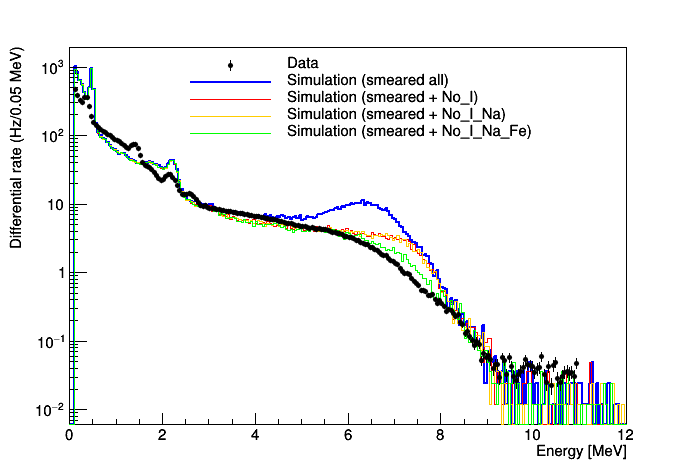

In [53]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)

h_k100sim_bkg_NaI_Edep_all_smeared.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_all_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')

h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetLineColor(rt.kRed)
h_k100sim_bkg_NaI_Edep_sansI127_smeared.Draw('hist same')

h_k100sim_bkg_NaI_Edep_No_I_Na_smeared.SetLineColor(rt.kOrange)
h_k100sim_bkg_NaI_Edep_No_I_Na_smeared.Draw('hist same')

h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.SetLineColor(rt.kGreen)
h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.Draw('hist same')

h_data.Draw('same')

legend = rt.TLegend(0.25,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_smeared,'Simulation (smeared all)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_sansI127_smeared,'Simulation (smeared + No_I)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_No_I_Na_smeared,'Simulation (smeared + No_I_Na)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared,'Simulation (smeared + No_I_Na_Fe)','l')

legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

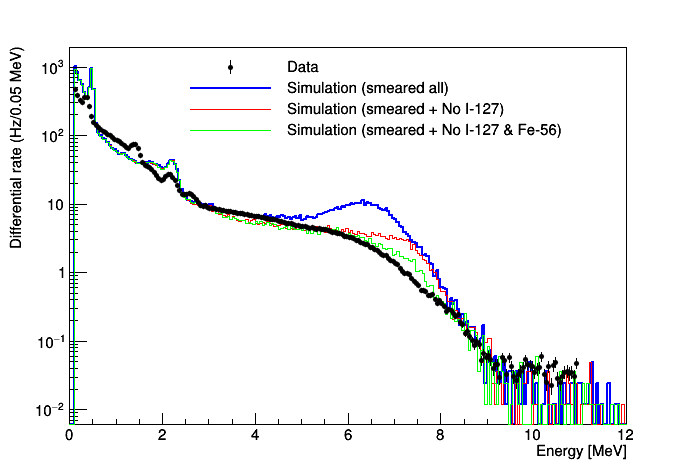

In [58]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)

h_k100sim_bkg_NaI_Edep_all_smeared.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_all_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')

h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetLineColor(rt.kRed)
h_k100sim_bkg_NaI_Edep_sansI127_smeared.Draw('hist same')

trigger_rate_smeared_I_Fe.SetLineColor(rt.kGreen)
trigger_rate_smeared_I_Fe.Draw('hist same')

# h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.SetLineColor(rt.kGreen)
# h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.Draw('hist same')

h_data.Draw('same')

legend = rt.TLegend(0.25,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_smeared,'Simulation (smeared all)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_sansI127_smeared,'Simulation (smeared + No I-127)','l')
legend.AddEntry(trigger_rate_smeared_I_Fe,'Simulation (smeared + No I-127 & Fe-56)','l')
#legend.AddEntry(h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared,'Simulation (smeared + No_I_Na_Fe)','l')

legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()